# Math 725 Advanced Linear Algebra
## Space filling Curves


### Brent A. Thorne

brentathorne@gmail.com

##### Coordinate functional space


$\require{AMScd}$
$\require{cancel}$
$\newcommand{\null}{\text{null}}$
$\newcommand{\P}{\mathcal{P}}$
$\newcommand{\B}{\mathcal{B}}$
$\newcommand{\0}{\{\Bbb{0}\}}$
$\newcommand{\C}{\Bbb{C}}$
$\newcommand{\1}{\Bbb{1}}$
$\newcommand{\range}{\text{range}}$
$\newcommand{\T}{\mathcal{T}}$
$\newcommand{\M}{\mathcal{M}}$
$\newcommand{\U}{\mathbf{U}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\W}{\mathbf{W}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\F}{\mathbb{F}}$
$\newcommand{\v}[2]{#1_1...#1_#2}$

In [65]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
from sympy import I
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sympy import init_printing
init_printing()

## Open with a semimanual process then generalize

In [116]:
def m_plot(P):
    p=np.array(P.tolist())
    x=p[0]
    y=p[1]
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.scatter(x[0],y[0],c='pink')
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')

⎡-1  -1  1  1 ⎤
⎢             ⎥
⎣-1  1   1  -1⎦

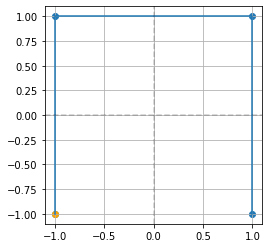

In [73]:
P=Matrix([[-1,-1],[-1,1],[1,1],[1,-1]]).T
m_plot(P)
P

⎛⎡-1  -1  1  1 ⎤  ⎡-1  1   1  -1⎤⎞
⎜⎢             ⎥, ⎢             ⎥⎟
⎝⎣-1  1   1  -1⎦  ⎣-1  -1  1  1 ⎦⎠

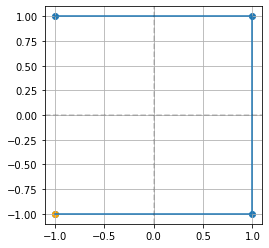

In [74]:
# rotate
R = Matrix([[0,1],[1,0]])
m_plot(R*P)
P, R*P

# shift left and shift down... ought to have opened with an affine matrix
# let's do that again...

⎡-1/2  -1/2  1/2  1/2 ⎤
⎢                     ⎥
⎢-1/2  1/2   1/2  -1/2⎥
⎢                     ⎥
⎢ 0     0     0    0  ⎥
⎢                     ⎥
⎣ 1     1     1    1  ⎦

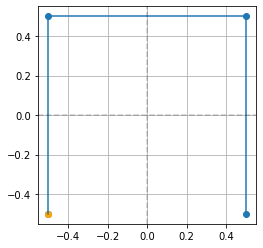

In [109]:
# let's begin again this time with a 3D affine transformation so we don't have to do this thrice 
T = Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])

# Now our 2D shape, we'll save that 3rd dim for later
P = sym.Rational(1,2)*Matrix([[-1,-1],[-1,1],[1,1],[1,-1]]).T #make normal unit square
P = P.col_join(sym.zeros(1,P.shape[1]))
P = P.col_join(sym.ones(1,P.shape[1]))
m_plot(T*P)
T*P

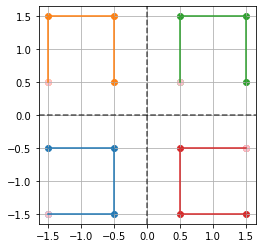

In [138]:
R = Matrix([
    [0,1,0,0],
    [1,0,0,0],
    [0,0,1,0],
    [0,0,0,1]
]) # actaully this is not right but let's roll with it 

S_1 = Matrix([
    [1,0,0,-1],
    [0,1,0,-1],
    [0,0,1,0],
    [0,0,0,1]
])
m_plot(S_1*R*P) #rotate and shift left and down

S_2 = Matrix([
    [1,0,0,-1],
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1]
])

m_plot(S_2*P) # shift left and up

S_3 = Matrix([
    [1,0,0,1],
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1]
])

m_plot(S_3*P) # shift right and up

S_4 = Matrix([
    [1,0,0,1],
    [0,1,0,-1],
    [0,0,1,0],
    [0,0,0,1]
])

R_0 = Matrix([
    [0,-1,0,0],
    [-1,0,0,0],
    [0,0,1,0],
    [0,0,0,1]
]) # infinite monkeys

m_plot(S_4*R_0*P)

In [192]:
# my monkey
x = P

X = S_1*R*x
X = X.row_join(S_2*x)
X = X.row_join(S_3*x)
X = X.row_join(S_4*R_0*x)
X = sym.Rational(2,6)*X # normalize back to unit square <- not quite
N = Matrix([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,sym.Rational(6,2)]
]) 


P1=N*X
X, P1

⎛⎡-1/2  -1/6  -1/6  -1/2  -1/2  -1/2  -1/6  -1/6  1/6  1/6  1/2  1/2  1/2   1/
⎜⎢                                                                            
⎜⎢-1/2  -1/2  -1/6  -1/6  1/6   1/2   1/2   1/6   1/6  1/2  1/2  1/6  -1/6  -1
⎜⎢                                                                            
⎜⎢ 0     0     0     0     0     0     0     0     0    0    0    0    0     0
⎜⎢                                                                            
⎝⎣1/3   1/3   1/3   1/3   1/3   1/3   1/3   1/3   1/3  1/3  1/3  1/3  1/3   1/

6   1/6   1/2 ⎤  ⎡-1/2  -1/6  -1/6  -1/2  -1/2  -1/2  -1/6  -1/6  1/6  1/6  1/
              ⎥  ⎢                                                            
/6  -1/2  -1/2⎥  ⎢-1/2  -1/2  -1/6  -1/6  1/6   1/2   1/2   1/6   1/6  1/2  1/
              ⎥, ⎢                                                            
     0     0  ⎥  ⎢ 0     0     0     0     0     0     0     0     0    0    0
              ⎥  ⎢                                 

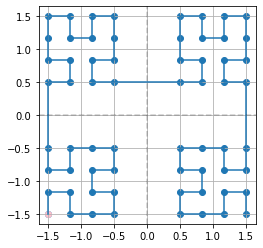

In [195]:
# release the monkey
x = P1

X = S_1*R*x
X = X.row_join(S_2*x)
X = X.row_join(S_3*x)
X = X.row_join(S_4*R_0*x)

m_plot(X) # nope not quite, but we'll save some fun for Arek